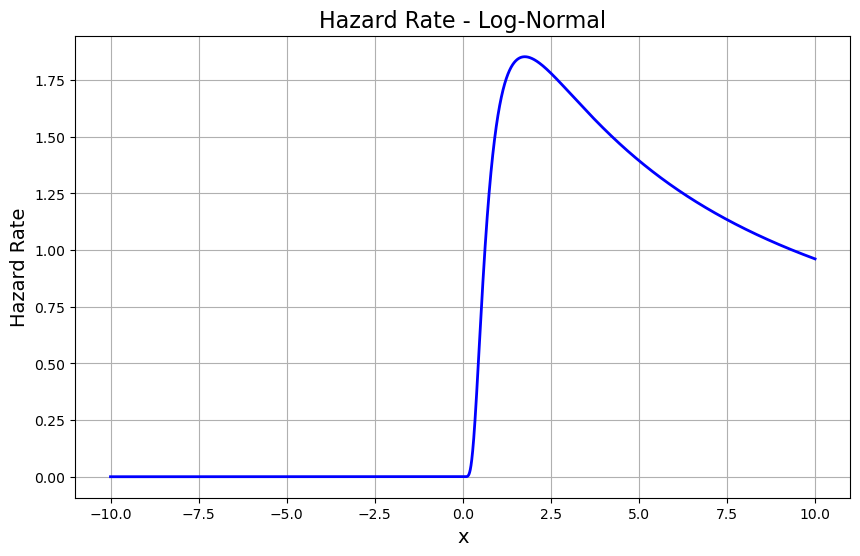

/var/folders/zj/y_2y230d1z18y9001xkg2qgw0000gn/T/ipykernel_25205/2737116023.py:20: RuntimeWarning: invalid value encountered in divide
  hazard_rate = np.where(survival_values > 0, pdf_values / survival_values, np.nan)


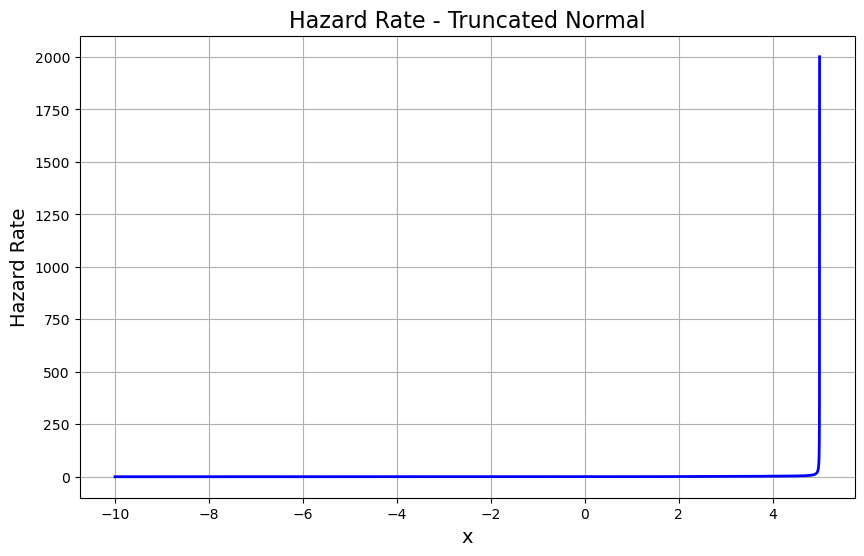

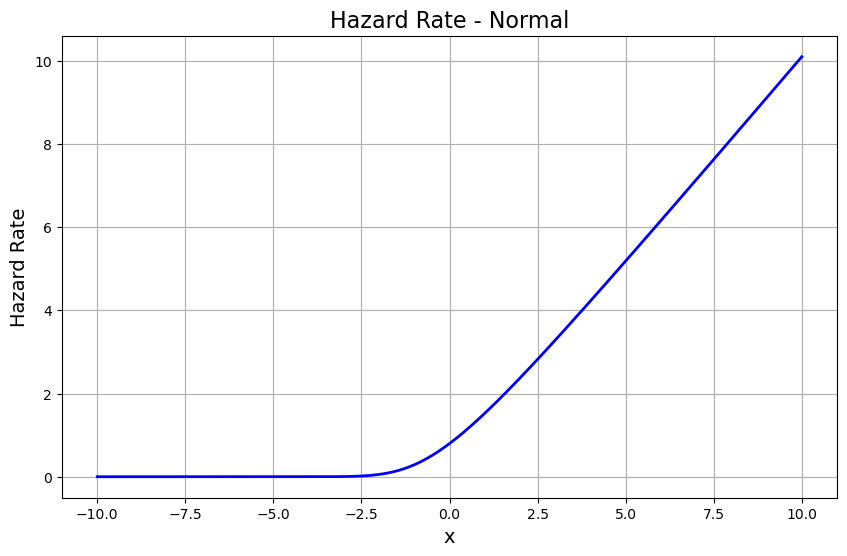

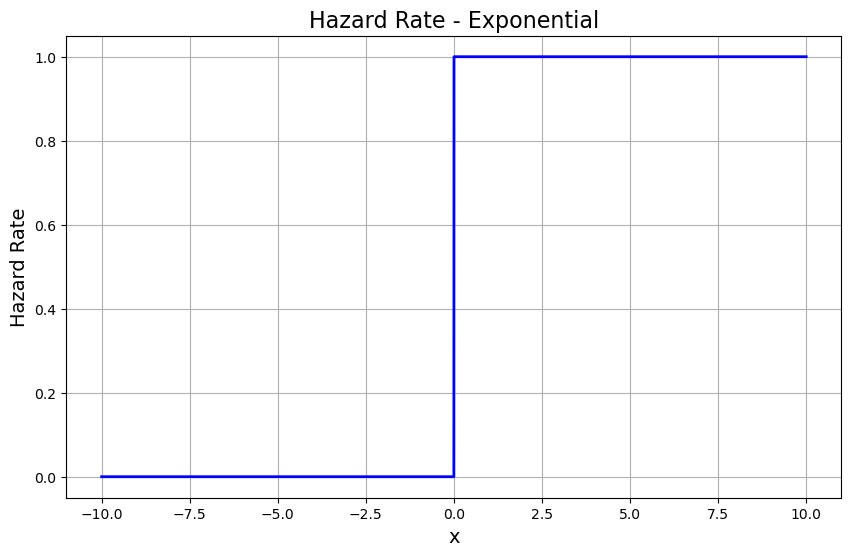

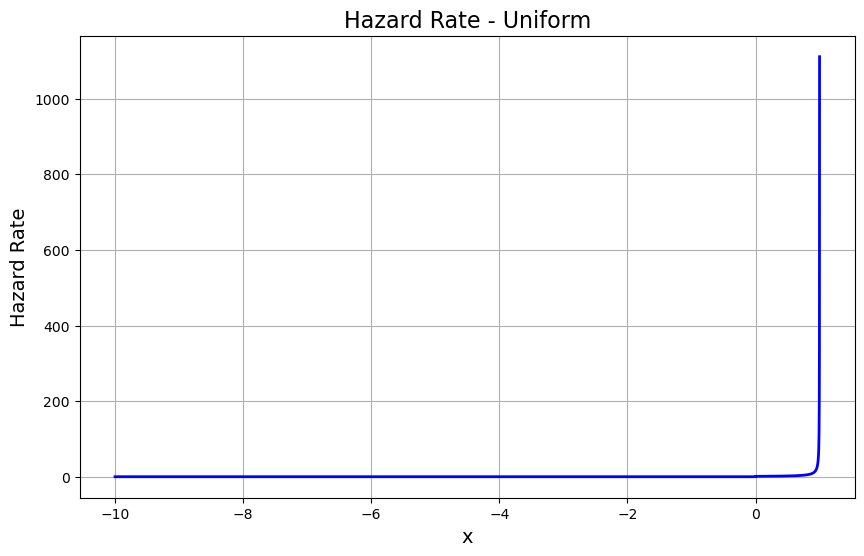

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, truncnorm, norm, expon, uniform

def plot_hazard_rate(distribution, x_range, params, dist_name):
    """
    Plots the hazard rate function for a given distribution.
    
    Args:
        distribution: A scipy.stats distribution object.
        x_range: The range of x values as a numpy array.
        params: Parameters for the distribution (shape, loc, scale).
        dist_name: Name of the distribution for the plot title.
    """
    # PDF and Survival Function of the distribution
    pdf_values = distribution.pdf(x_range, *params)
    survival_values = distribution.sf(x_range, *params)  # Use survival function directly
    
    # Avoid division by zero for Survival Function
    hazard_rate = np.where(survival_values > 0, pdf_values / survival_values, np.nan)
    
    # Create a plot for the hazard rate
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, hazard_rate, color='blue', lw=2)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Hazard Rate', fontsize=14)
    plt.title(f'Hazard Rate - {dist_name}', fontsize=16)
    plt.grid(True)
    plt.show()

# Parameters for the distributions
x = np.linspace(-10, 10, 10000)  # Range includes negative values
  # Range of x values

# Log-Normal Distribution
lognorm_params = (0.5, 0, 1)  # sigma=0.5, loc=0, scale=1
plot_hazard_rate(lognorm, x, lognorm_params, 'Log-Normal')

# Truncated Normal Distribution
a, b = (0 - 2) / 1, (5 - 2) / 1  # Truncation bounds (mean=2, std=1)
trunc_params = (a, b, 2, 1)  # a, b, mean, std
plot_hazard_rate(truncnorm, x, trunc_params, 'Truncated Normal')

# Normal Distribution
norm_params = (0, 1)  # mean=0, std=1
plot_hazard_rate(norm, x, norm_params, 'Normal')

# Exponential Distribution
expon_params = (0, 1)  # loc=0, scale=1
plot_hazard_rate(expon, x, expon_params, 'Exponential')

# Uniform Distribution
uniform_params = (0, 1)  # loc=0, scale=1
plot_hazard_rate(uniform, x, uniform_params, 'Uniform')

